In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class_num = 2

## Model

In [3]:
from keras.preprocessing import image
from keras.models import Sequential, model_from_json
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import utils, optimizers, applications

/home/phongsathron/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(applications.resnet50.ResNet50(include_top=False, input_shape=(224, 224, 3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(class_num, activation='softmax'))

/home/phongsathron/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [5]:
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()

# model = model_from_json(loaded_model_json)
# # load weights into new model
# # loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 200706    
Total params: 23,788,418
Trainable params: 23,735,298
Non-trainable params: 53,120
_________________________________________________________________


In [7]:
ls

accuracy.png       model.json               texting_message_066.jpg
data/              mrcnn/                   texting_message_085.jpg
keras_retinanet/   snapshots/               texting_message_190.jpg
logs/              test2.h5                 train.py
loss.png           test3.h5                 Untitled.ipynb
main.py            test.h5                  writing_on_a_book_018.jpg
mask_rcnn_coco.h5  texting_message_058.jpg  writing_on_a_book_025.jpg


In [8]:
model.load_weights("test3.h5")

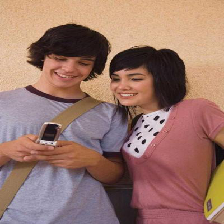

In [16]:
img = image.load_img(os.path.abspath("texting_message_085.jpg"), target_size=(224, 224))
img

In [10]:
labels = ["use phone", "writing"]

In [17]:
img = image.img_to_array(img)
img = applications.resnet50.preprocess_input(img)
# img[:] = np.max(img,axis=-1,keepdims=1)/2+np.min(img,axis=-1,keepdims=1)/2
# img /= 255
img = np.expand_dims(img, axis=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


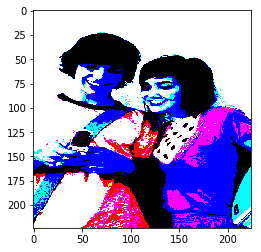

In [20]:
plt.imshow(img[0])

In [21]:
test = model.predict(img)

In [22]:
test

array([[0., 1.]], dtype=float32)